In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
ner = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(ner.vocab)
pattern = ner('Hermione')
matcher.add('HERMIONE', [pattern])

## Load books

In [4]:
import os

all_books = [b for b in os.scandir('data') if '.txt' in b.name]
all_books

[<DirEntry "Book 1 - The Philosopher's Stone.txt">,
 <DirEntry 'Book 2 - The Chamber of Secrets.txt'>,
 <DirEntry 'Book 3 - The Prisoner of Azkaban.txt'>,
 <DirEntry 'Book 4 - The Goblet of Fire.txt'>,
 <DirEntry 'Book 5 - The Order of the Phoenix.txt'>,
 <DirEntry 'Book 6 - The Half Blood Prince.txt'>,
 <DirEntry 'Book 7 - The Deathly Hallows.txt'>]

In [6]:
book = all_books[3]
book_text = open(book, encoding='utf8').read()
ner.max_length = 2000000 
book_doc = ner(book_text.strip('\n '))


In [7]:
book_doc.ents

(Little Hangleton,
 Riddle House,
 many years,
 Riddle,
 the Riddle House,
 Half a century ago,
 Fifty 
 years,
 the Riddle House,
 Harry Potter,
 three,
 Riddles,
 Little 
 Hangleton,
 Riddles,
 Tom,
 three,
 the 
 same night,
 The Hanged Man,
 Riddles,
 Frank Bryce,
 Frank,
 Frank Bryce,
 Riddle,
 Frank,
 Riddles,
 3,
 Harry Potter,
 fourth,
 hundred,
 Frank,
 last night,
 Frank,
 Frank,
 Dot,
 Dot,
 the following morning,
 Little 
 Hangleton,
 Frank Bryce,
 Harry Potter,
 Great Hangleton,
 Frank,
 Frank,
 Frank,
 Riddles,
 Riddles,
 Riddles,
 Riddles,
 three,
 Riddles,
 Frank,
 Little Hangleton,
 Frank Bryce,
 the Riddle House,
 Harry Potter,
 Frank,
 the Riddle House,
 Frank,
 the Riddle House,
 these 
 days,
 Frank,
 Frank,
 seventh,
 Frank,
 Riddle,
 Frank,
 Frank,
 Frank,
 Frank,
 one 
 night,
 August,
 one,
 Harry Potter,
 Frank,
 the Riddle House,
 Frank,
 Frank,
 Riddles,
 the Riddle House,
 Frank,
 Frank,
 many years,
 Harry Potter,
 Frank,
 Frank,
 Several feet,
 second,
 F

In [ ]:
# visualize identified entities
displacy.render(book_doc[:2000], style='ent', jupyter=True)

## Load Character names

In [9]:
# laod characters
characters_df = pd.read_csv("characters.csv")
characters_df

,Unnamed: 0,character,info
0,0,Hannah Abbott,Hufflepuff student in Harry Potter's year. Pr...
1,1,Ludo Bagman,Head of the Department of Magical Games and S...
2,2,Bathilda Bagshot,"Author of A History of Magic, and the great a..."
3,3,Katie Bell,Gryffindor Quidditch Chaser one year above Ha...
4,4,Cuthbert Binns,"ghost, History of Magic professor."
...,...,...,...
197,197,Scabbers,Ron Weasley's pet rat in the first three stor...
198,198,Scabior,"Snatcher who captures Harry, Ron and Hermione..."
199,199,Travers,Wizard and Death Eater who escapes from Azkab...
200,200,Trevor,Neville Longbottom's perpetually-misplaced pe...


In [10]:
def frequently_used_names(name):
    name_dict = {'Vincent Crabbe':'Crabbe',
           'Albus Dumbledore': 'Dumbledore',
           'Argus Filch': 'Filch',
           'Filius Flitwick': 'Flitwick',
           'Cornelius Fudge': 'Fudge',
           'Gregory Goyle': 'Goyle',
           'Gellert Grindelwald': 'Grindelwald',
           'Rubeus Hagrid': 'Hagrid',
           'Draco Malfoy': 'Malfoy',
           'Minerva McGonagall': 'McGonagall',
           'Alator Moody': 'Moody',
           'Garrick Ollivander': 'Ollivander',
           'Poppy Pomfrey': 'Pomfrey',
           'Quirinus Quirrell': 'Quirrell',
           'Severus Snape': 'Snape',
           'Sybil Trelawney': 'Trelawney',
           'Dolores Umbridge': 'Umbridge',
           'Lord Voldemort': 'Voldemort',
           'Madam Rosmerta': 'Rosmerta',
           }
    if name in name_dict.keys():
        return name_dict[name]
    return name.split()[0].strip()

In [11]:
# remove brackets and text within brackets
import re
characters_df['character'] = characters_df['character'].apply(lambda x: x.strip())
characters_df['character'] = characters_df['character'].apply(lambda x: re.sub('[\(].*?[\)]', '', x))
# characters_df['character_firstname'] = characters_df['character'].apply(lambda x: x.split()[0])
characters_df['character_freqname'] = characters_df['character'].apply(lambda x: frequently_used_names(x))

In [12]:
pd.set_option('display.max_rows', None)
characters_df

,Unnamed: 0,character,info,character_freqname
0,0,Hannah Abbott,Hufflepuff student in Harry Potter's year. Pr...,Hannah
1,1,Ludo Bagman,Head of the Department of Magical Games and S...,Ludo
2,2,Bathilda Bagshot,"Author of A History of Magic, and the great a...",Bathilda
3,3,Katie Bell,Gryffindor Quidditch Chaser one year above Ha...,Katie
4,4,Cuthbert Binns,"ghost, History of Magic professor.",Cuthbert
5,5,Phineas Nigellus Black,Great-great-grandfather of Sirius Black and f...,Phineas
6,6,Sirius Black,Harry's godfather who was a close friend of H...,Sirius
7,7,Amelia Bones,Head of the Department of Magical Law Enforce...,Amelia
8,8,Susan Bones,Hufflepuff student in Harry's year. Member of...,Susan
9,9,Terry Boot,Ravenclaw student in Harry's year. Member of ...,Terry


## Get named entity list per sentence

In [13]:
sent_entity_df = []

# loop through sentences, store named entity list for each sentence 
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    for match_id, start, end in matcher(sent):
        entity_list.append(book_doc[start:end].text)
    sent_entity_df.append({'sentence': sent, 'entities': entity_list})
    
    
sent_entity_df = pd.DataFrame(sent_entity_df)


In [ ]:
sent_entity_df

In [15]:
# function to filter out non-character entities

def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
           if ent in list(character_df.character_freqname)]


In [16]:
filter_entity(['Harry', 'Bludger', 'morning'], characters_df)

['Harry']

In [17]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, characters_df))

# filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len)>0]

In [ ]:
sent_entity_df_filtered

In [18]:
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])

C:\Users\chath\AppData\Local\Temp/ipykernel_4560/3486705514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])


In [19]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities,character_entities
18,"(\n\n, “, Frank, !, ”, cried, several, people, .)",[Frank],[Frank]
22,"(Frank, had, come, back, from, the, war, with,...","[Frank, Riddles]",[Frank]
28,"(\n\n, “, Ah, ,, now, ,, ”, said, a, woman, at...",[Frank],[Frank]
34,"(All, Frank, had, to, do, was, creep, up, to, ...",[Frank],[Frank]
39,"(\n\n, “, Told, you, I, would, n’t, like, to, ...","[Frank, Dot]",[Frank]
...,...,...,...
14589,"(She, hugged, Harry, very, \n, tightly, when, ...","[Harry, Dumbledore, the \nsummer]","[Harry, Dumbledore]"
14590,"(Keep, in, touch, ,, Harry, ., ”)",[Harry],[Harry]
14591,"(\n\n, “, See, you, ,, Harry, ,, ”, said, Ron,...",[Ron],[Ron]
14592,"(\n\n, “, ’, Bye, ,, Harry, !, ”, said, Hermio...","[Hermione, Hermione]","[Hermione, Hermione]"


## Create relationships

In [20]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum(sent_entity_df_filtered.loc[i:end_i].character_entities, [])
    
    # remove duplicated characters next to each other
    char_unique = [char_list[i] for i in range(len(char_list))
                  if (i==0) or char_list[i] != char_list[i-1]]
    if len(char_unique)>1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({'source': a, 'target':  b})

In [21]:
relationships

[{'source': 'Frank', 'target': 'Nagini'},
 {'source': 'Frank', 'target': 'Nagini'},
 {'source': 'Frank', 'target': 'Nagini'},
 {'source': 'Nagini', 'target': 'Frank'},
 {'source': 'Nagini', 'target': 'Frank'},
 {'source': 'Bertha', 'target': 'Frank'},
 {'source': 'Bertha', 'target': 'Frank'},
 {'source': 'Nagini', 'target': 'Frank'},
 {'source': 'Nagini', 'target': 'Frank'},
 {'source': 'Nagini', 'target': 'Frank'},
 {'source': 'Nagini', 'target': 'Frank'},
 {'source': 'Frank', 'target': 'Nagini'},
 {'source': 'Frank', 'target': 'Nagini'},
 {'source': 'Nagini', 'target': 'Frank'},
 {'source': 'Nagini', 'target': 'Frank'},
 {'source': 'Nagini', 'target': 'Frank'},
 {'source': 'Nagini', 'target': 'Frank'},
 {'source': 'Nagini', 'target': 'Frank'},
 {'source': 'Peter', 'target': 'Harry'},
 {'source': 'Peter', 'target': 'Harry'},
 {'source': 'Peter', 'target': 'Harry'},
 {'source': 'Harry', 'target': 'Dudley'},
 {'source': 'Harry', 'target': 'Hermione'},
 {'source': 'Hermione', 'target': '

In [22]:
relationship_df = pd.DataFrame(relationships)
relationship_df

,source,target
0,Frank,Nagini
1,Frank,Nagini
2,Frank,Nagini
3,Nagini,Frank
4,Nagini,Frank
...,...,...
13815,Harry,Ron
13816,Ron,Hermione
13817,Ron,Hermione
13818,Hermione,Hagrid


In [23]:
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis=1), columns=relationship_df.columns)
relationship_df['value'] = 1
relationship_df = relationship_df.groupby(['source', 'target'], sort=False, as_index=False).sum()

In [24]:
relationship_df

,source,target,value
0,Frank,Nagini,16
1,Bertha,Frank,2
2,Harry,Peter,3
3,Dudley,Harry,51
4,Harry,Hermione,865
...,...,...,...
373,Fleur,Hagrid,4
374,Crookshanks,Hedwig,6
375,Fudge,Rita,5
376,George,Goyle,5


In [25]:
relationship_df.value.max(), relationship_df.value.min()

(2700, 1)

## Graph Analysis and visualization

In [32]:
# create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df[relationship_df.value > 7],
                           source='source',
                           target='target',
                           edge_attr='value',
                           create_using=nx.Graph())

### Graph visualization - Networkx

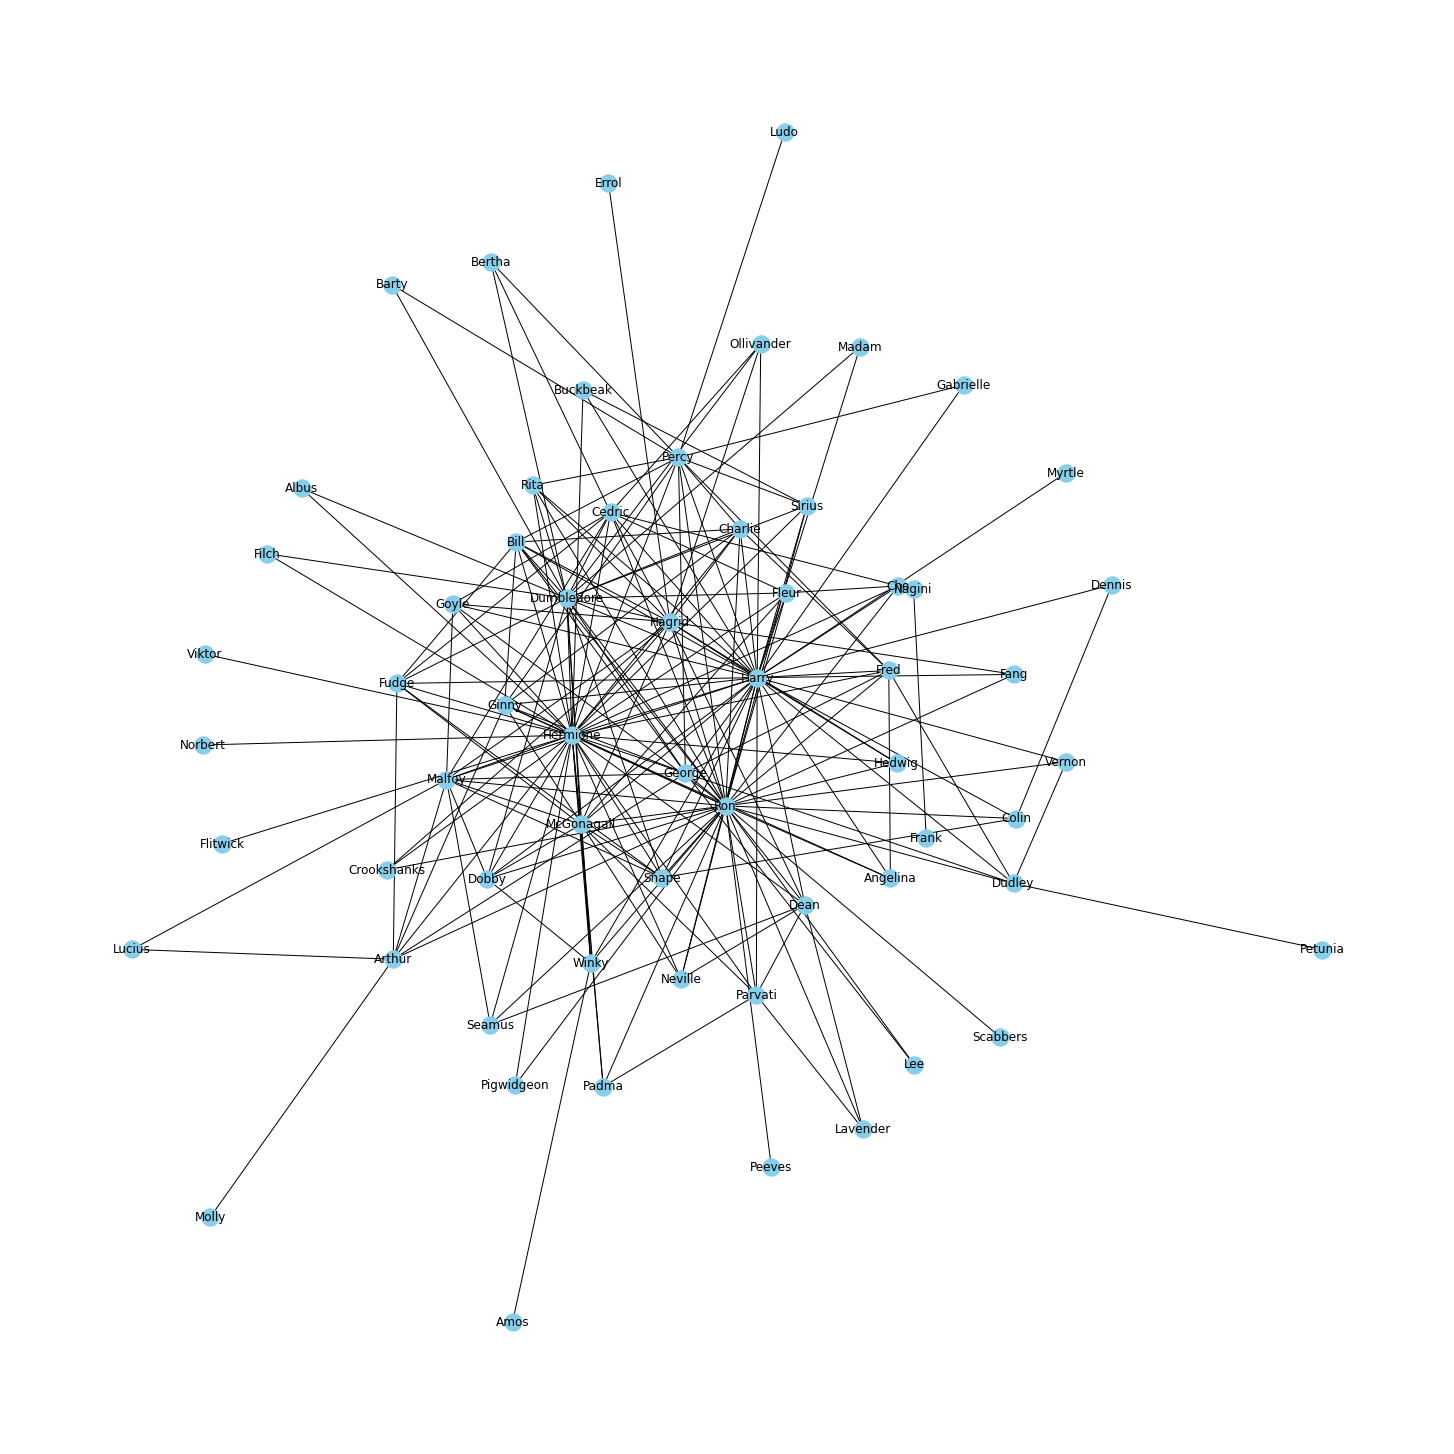

In [33]:
plt.figure(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

### Graph visualization - pyvis

In [34]:
from pyvis.network import Network
net = Network(notebook=True, width='1000px', height='700px', bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

# setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')
# net.toggle_physics(False)
net.from_nx(G)
net.show('HP7.html')

## The most important characters in Harry Potter 1

In [35]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Frank': 0.01639344262295082,
 'Nagini': 0.01639344262295082,
 'Dudley': 0.09836065573770492,
 'Harry': 0.6065573770491803,
 'Hermione': 0.6229508196721312,
 'Dumbledore': 0.36065573770491804,
 'Ron': 0.639344262295082,
 'Buckbeak': 0.04918032786885246,
 'Hedwig': 0.06557377049180328,
 'Petunia': 0.01639344262295082,
 'Vernon': 0.04918032786885246,
 'Hagrid': 0.27868852459016397,
 'Errol': 0.01639344262295082,
 'Arthur': 0.13114754098360656,
 'Sirius': 0.09836065573770492,
 'George': 0.19672131147540983,
 'Fred': 0.13114754098360656,
 'Bill': 0.1639344262295082,
 'Charlie': 0.14754098360655737,
 'Percy': 0.22950819672131148,
 'Ginny': 0.14754098360655737,
 'Molly': 0.01639344262295082,
 'Scabbers': 0.01639344262295082,
 'Crookshanks': 0.04918032786885246,
 'Bertha': 0.04918032786885246,
 'Seamus': 0.06557377049180328,
 'Ludo': 0.01639344262295082,
 'Barty': 0.03278688524590164,
 'Dobby': 0.11475409836065574,
 'Malfoy': 0.21311475409836067,
 'Winky': 0.11475409836065574,
 'Lucius': 0.0

<AxesSubplot:>

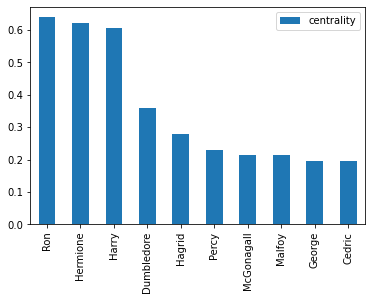

In [36]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[:10].plot(kind='bar')

<AxesSubplot:>

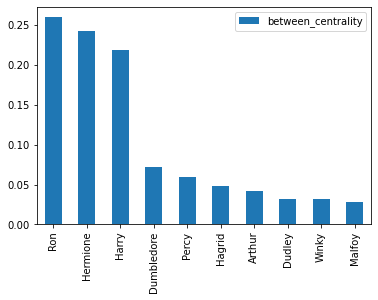

In [37]:
# betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['between_centrality'])
# plot top 10 nodes
betweenness_df.sort_values('between_centrality', ascending=False)[:10].plot(kind='bar')

<AxesSubplot:>

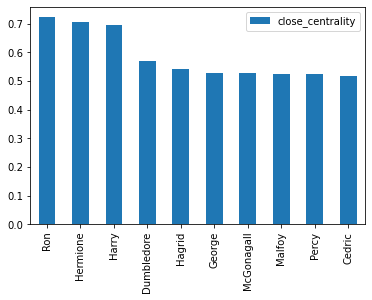

In [38]:
# closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['close_centrality'])
# plot top 10 nodes
closeness_df.sort_values('close_centrality', ascending=False)[:10].plot(kind='bar')

In [39]:
# save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

## Community Detection

In [40]:
from community import community_louvain

In [41]:
communities = community_louvain.best_partition(G)
communities

{'Frank': 0,
 'Nagini': 0,
 'Dudley': 1,
 'Harry': 4,
 'Hermione': 6,
 'Dumbledore': 5,
 'Ron': 3,
 'Buckbeak': 6,
 'Hedwig': 3,
 'Petunia': 1,
 'Vernon': 1,
 'Hagrid': 3,
 'Errol': 3,
 'Arthur': 2,
 'Sirius': 6,
 'George': 1,
 'Fred': 1,
 'Bill': 1,
 'Charlie': 1,
 'Percy': 1,
 'Ginny': 1,
 'Molly': 2,
 'Scabbers': 3,
 'Crookshanks': 3,
 'Bertha': 5,
 'Seamus': 3,
 'Ludo': 1,
 'Barty': 5,
 'Dobby': 4,
 'Malfoy': 2,
 'Winky': 4,
 'Lucius': 2,
 'Fudge': 4,
 'Viktor': 6,
 'Cedric': 5,
 'Amos': 4,
 'Albus': 5,
 'Rita': 3,
 'Pigwidgeon': 6,
 'Neville': 3,
 'Goyle': 5,
 'Dean': 3,
 'McGonagall': 4,
 'Colin': 4,
 'Dennis': 4,
 'Parvati': 3,
 'Snape': 4,
 'Cho': 5,
 'Peeves': 3,
 'Filch': 5,
 'Norbert': 6,
 'Lavender': 3,
 'Lee': 1,
 'Angelina': 6,
 'Fang': 3,
 'Fleur': 5,
 'Ollivander': 5,
 'Madam': 5,
 'Padma': 3,
 'Myrtle': 4,
 'Flitwick': 6,
 'Gabrielle': 4}

In [42]:
nx.set_node_attributes(G,communities, 'group')

In [43]:
com_net = Network(notebook=True, width='1000px', height='700px', bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show('HP7_communities.html')